# Intro

The purpose is to demonstrate failure of error propagation in ratio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

## Generate samples of random variables
This simulates the last pT bin on the right plot on slide 12 of  Oliver's presentation: https://indico.cern.ch/event/732642/contributions/3037214/attachments/1665719/2670220/20180611_BDT_DNN_Nclust_studies.pdf

Note, that values are clipped at 2 to avoid division by 0

In [2]:
mu_sherpa = 40.
mu_data = 30.
mu_pythia = 180.
std_sherpa = 20.
std_data = 10.
std_pythia = 20.

mu_toy = mu_sherpa
std_toy = 1

np.random.seed(0)
sherpa = np.clip(np.random.normal(loc=mu_sherpa, scale=std_sherpa, size=100000), 2, None)
np.random.seed(1)
data = np.clip(np.random.normal(loc=mu_data, scale=std_data, size=100000), 2, None)
np.random.seed(2)
pythia = np.clip(np.random.normal(loc=mu_pythia, scale=std_pythia, size=100000), 2, None)
np.random.seed(3)
toy = np.clip(np.random.normal(loc=mu_toy, scale=std_toy, size=100000), 2, None)

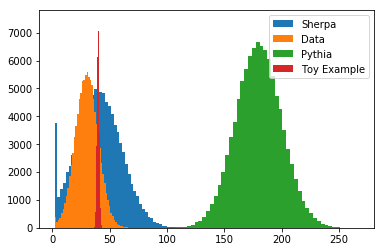

In [3]:
_ = plt.hist(sherpa, bins = 50, label='Sherpa')
_ = plt.hist(data, bins = 50, label='Data')
_ = plt.hist(pythia, bins = 50, label='Pythia')
_ = plt.hist(toy, bins = 50, label='Toy Example')
_ = plt.legend()

## Make the ratio

In [4]:
d_o_s = data / sherpa
d_o_p = data / pythia
d_o_t = data / toy

## Do error propagation of uncertainties in the usual way

In [5]:
import math

mu_d_o_s = mu_data / mu_sherpa
std_d_o_s = mu_d_o_s * math.sqrt(math.pow(std_sherpa/mu_sherpa, 2) + math.pow(std_data/mu_data, 2))

mu_d_o_p = mu_data / mu_pythia
std_d_o_p = mu_d_o_p * math.sqrt(math.pow(std_pythia/mu_pythia, 2) + math.pow(std_data/mu_data, 2))

# x will be used to define points for pdf line drawing
x = np.linspace(1e-6, 2, 100)

## Final ratio plot

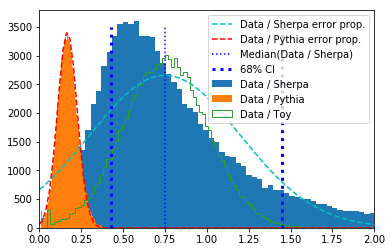

In [13]:
import matplotlib.mlab as mlab

_ = plt.hist(d_o_s, bins = 1000, label='Data / Sherpa')
_ = plt.hist(d_o_p, bins = 100, label='Data / Pythia')
_ = plt.hist(d_o_t, bins = 100, label='Data / Toy', histtype='step')
_ = plt.plot(x,3000*mlab.normpdf(x, mu_d_o_s, std_d_o_s), c='c', ls='dashed', label='Data / Sherpa error prop.')
_ = plt.plot(x,500*mlab.normpdf(x, mu_d_o_p, std_d_o_p), c='r', ls='dashed', label='Data / Pythia error prop.')
_ = plt.plot([np.median(d_o_s), np.median(d_o_s)], [0,3500], c='b', ls='dotted', label='Median(Data / Sherpa)')
_ = plt.plot([np.percentile(d_o_s,16), np.percentile(d_o_s,16)], [0,3500], c='b', lw=3, ls='dotted', label='68% CI')
_ = plt.plot([np.percentile(d_o_s,82), np.percentile(d_o_s,82)], [0,3500], c='b', lw=3, ls='dotted', label='')
plt.xlim(0,2)
_ = plt.legend()

As you can see the error propagation works fine for the Data-to-Pythia ratio, but it fails to describe the actual probability distribution for Data-over-Sherpa. The median of the assymetric ratio sample is spot-on with the expected position.

A ratio to a toy sample with the same mean as Sherpa but with a negligible width was added (solid green line) and show reasonably gaussian shape.

In [7]:
np.percentile(d_o_s, 16)

0.42580258048452146